In [1]:
import tdmclient.notebook
await tdmclient.notebook.start()

In [2]:

import cv2
import math

import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import size
from matplotlib import colors
from asgiref.sync import sync_to_async #in order to load variables to communicate between sync and async

import optimal_path as op

from robot import Robot
from Map import Map
from Local_navigation import* 
from Mouvement import*
from vision import*
from optimal_path import* 


map_lenght = 1
nb_of_square_by_side = 50
current = 1

global move 
move = False #bool which indicate how our robot is moving (1: avoid an object VS 0: following the optimal path)
kalman_bool = False
old_distance = 0
old_angle = 0
ERR_POS = 3
#pourcentage_reduc = 1

In [3]:


#VideoCap = vision_initialization()
VideoCap=cv2.VideoCapture(1)


In [4]:
@tdmclient.notebook.sync_var
def motors(l_speed=500, r_speed=500, verbose=False):
    """
    Sets the motor speeds of the Thymio 
    param l_speed: left motor speed
    param r_speed: right motor speed
    param verbose: whether to print status messages or not
    """
    global motor_left_target, motor_right_target
    # Printing the speeds if requested
    if verbose:
        print("\t\t Setting speed : ", l_speed, r_speed)
    motor_left_target = l_speed
    motor_right_target = r_speed

In [5]:
@tdmclient.notebook.sync_var
def proxi():
    """
    Returns the proximity values of the Thymio 
    """
    global prox_horizontal
    return prox_horizontal


In [3]:
#############################
#Test MASK  A LANCER QUE POUR FAIRE DES TESTS SUR LE MASK
#############################

while True:
    ret, frame = VideoCap.read()
    mask, b = mask_map_init(frame)
    
    keyVal = cv2.waitKey(1) & 0xFF
    if keyVal == ord('q'):
        break
    #cv2.imshow("mask",mask)
    #cv2.imshow("mask B",b)
    #pos_robot, angle = update(frame, 0.5)


Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2
Hello2

In [6]:
George = Robot()
Lausanne = Map(map_lenght, nb_of_square_by_side)

taille frame (1080, 1920, 3)
MAP INITIALISATION
first while
searching for the strart pos
goal (33, 34)
start position (72, 6)
PATH COMPUTATION


True

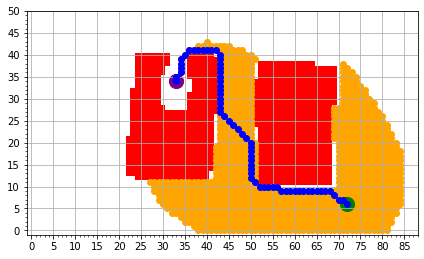

In [7]:
#np.set_printoptions(threshold=sys.maxsize)
####################################
## INIT
####################################
nb_frame_to_take = 10
# Prend une première image
for i in range (nb_frame_to_take): 
    ret, frame = VideoCap.read()
    
print("taille frame", frame.shape)
cv2.imwrite("debut.jpg", frame)

print("MAP INITIALISATION")
# Set the pourcentage value between the nb of pixel and nb of square by side
Lausanne.set_map_lenght(frame)
#print("Pourcentage",Lausanne.get_pourcentage())
# Set the robot goal, position and angle
goal = init_goal(frame, Lausanne.get_pourcentage())
#goal = (50, 40)

# Set pour relancer direct
pos_robot = (-1,-1)
George.set_pos(pos_robot) 
#print("GOAL", goal)

print("first while")
#pos_robot, angle = update(frame, Lausanne.get_pourcentage())  # fonction qui retourne la position angle etc....
 
      #Utiliser au cas où il ne trouve pas la bonne position du premier coup
while (pos_robot[0] <= 0) & (pos_robot[1] <= 0):
    #ret, frame=VideoCap.read()
    #display(frame,1,0,0)
    print("searching for the strart pos")
    ret, frame=VideoCap.read()
    #vs.display (frame, 0, 1, 1, 0, 5, Lausanne.get_pourcentage())
    pos_robot, angle = update(frame, Lausanne.get_pourcentage())  # fonction qui retourne la position angle etc....
    #print("Waiting robot position") 

George.set_angle(angle)
George.set_goal(goal)
George.set_start_pos(pos_robot)
George.set_pos(pos_robot)
print ("goal", goal)
print ("start position", pos_robot)

# SET MAP
Lausanne.set_map_lenght(frame)
#print("Lausanna lenght", Lausanne.get_lenght())

# MASK 
mask_bleu, mask_green = mask_map_init(frame)
#cv2.imshow("mask", mask)
cv2.imwrite("masque1.jpg", mask_bleu)
cv2.imwrite("masque2.jpg", mask_green)

# Fin de l'init
Lausanne.init_grid(mask_bleu,mask_green)
grille = Lausanne.get_map()
#cv2.imshow("grid", grille)
cv2.imwrite("grille.jpg", grille)

# OPTIMAL PATH
print("PATH COMPUTATION")
path, visitedNodes = op.path_computation(George.get_start() , George.get_goal() , Lausanne.get_lenght(), grille)

George.set_path(path) 
George.set_visit_nodes(visitedNodes) 

# Display the optimal path
op.display_map(Lausanne.get_lenght(),  grille,  George.get_visit_nodes(), George.get_path(), George.get_start(), George.get_goal())
#print("PATH", George.get_path())

display (frame, 0, 1, 1, 1, George.get_path(), Lausanne.get_pourcentage())
#print("PATH22222", George.get_path())
cv2.imwrite("TOTAL.jpg", frame)

#vision_end(VideoCap)



In [8]:

####################################
## while
####################################

George.set_current(0)
current= 0
kalman_bool = False
print("PATH", George.get_path())
old_distance = 0
old_angle = 0
soon_arrived = False
thresh_indentation = 15
print('START MOUVEMENT')
while True:#(George.get_pos() != George.get_goal()):
    
    # Read the camera
    ret, frame=VideoCap.read()
    
    # Recupere la position et angle --> XAV
    pos_robot,angle_robot = update(frame, Lausanne.get_pourcentage())
    George.set_pos(pos_robot)
    George.set_angle(angle_robot)
    
    if(current < George.get_path().shape[1]-1):
        current = path_update(pos_robot, ERR_POS, np.transpose(George.get_path())[current], George.get_current())
        George.set_current(current)
    else:
        print("ARRIVED")
        motors(0,0)
        break
    
    #print("pos", pos_robot)
    print("taille", George.get_path().shape[1])
    print("current", current)
    pos_goal =  np.transpose(George.get_path())[current]
    
    if current > (George.get_path().shape[1] - thresh_indentation) :
        soon_arrived = True
        print('soon arrived')
    
    proximity = proxi()
    print ('proximity', proximity)
    move = check_cars(prox_horizonta=proximity)
    print('move check cars', move)
    
        #LOCAL NAVIGATION
    if move and not (soon_arrived):
        #Thymio is avoiding obstacles
        print("OBSTACLLLEEEE")
        speed_l, speed_r, move = avoid_obstacle(prox_horizonta=proximity) 
    else:
        #Thymio is following the optimal path
        print("Avancee")
        speed_l, speed_r, old_distance, old_goal  = move_to_position(pos_robot, angle_robot, pos_goal, old_distance, old_angle)
        #Thymio is checking if there's an obstacle in front of it
        move = check_cars(prox_horizonta=proximity)
        print (speed_l, speed_r)
       
    
    
    motors(speed_l, speed_r) 
    
    display (frame, 0, 1, 1, 1, path, Lausanne.get_pourcentage())
    
    # Quit when we press q
    keyVal = cv2.waitKey(1) & 0xFF
    if keyVal == ord('q'):
        motors(0,0)
        break
     
    sleep(0.1)

print("The End")
    

PATH [[72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 50
  50 50 50 50 50 50 50 49 48 47 46 45 44 43 43 43 43 43 43 43 43 43 43 43
  43 43 43 42 41 40 39 38 37 36 35 34 34 34 34 33 33]
 [ 6  7  7  8  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 11 12 13
  14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
  38 39 40 41 41 41 41 41 41 41 40 39 38 37 36 35 34]]
START MOUVEMENT
PATH [72  6]
X 0
Y 0
next goal plz
taille 65
current 1
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(72, 6)
old dist, 0 old angle 0
debut 72 6 2.9802175431691014
dist_debut 1.4142135623730951
-0.6240230529767565
new dist, 1.4142135623730951 new angle -0.6240230529767565
speed_original, 217 -31
speed, 200 -31
200 -31
PATH [71  7]
X 1
Y 1
next goal plz
taille 65
current 2
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(72, 6)
old dist, 1.4142135623730951 old angle 0
debut 72 6 2.959032800458887
dist_debut 2.2360679774997

PATH [63  9]
X 3
Y 0
taille 65
current 9
proximity [0, 0, 0, 0, 2924, 0, 0]
move check cars False
Avancee
movement
(66, 9)
old dist, 3.0 old angle 0
debut 66 9 3.109603569550479
dist_debut 3.0
0.031989084039314
new dist, 3.0 new angle 0.031989084039314
speed_original, 89 102
speed, 89 102
89 102
PATH [63  9]
X 3
Y 0
taille 65
current 9
proximity [0, 0, 0, 0, 2308, 0, 0]
move check cars False
Avancee
movement
(66, 9)
old dist, 3.0 old angle 0
debut 66 9 3.125720970597999
dist_debut 3.0
0.01587168299179398
new dist, 3.0 new angle 0.01587168299179398
speed_original, 92 99
speed, 92 99
92 99
PATH [63  9]
X 2
Y 0
next goal plz
taille 65
current 10
proximity [0, 0, 0, 0, 2145, 0, 0]
move check cars False
Avancee
movement
(65, 9)
old dist, 3.0 old angle 0
debut 65 9 3.125720970597999
dist_debut 3.0
0.01587168299179398
new dist, 3.0 new angle 0.01587168299179398
speed_original, 92 99
speed, 92 99
92 99
PATH [62  9]
X 3
Y 0
taille 65
current 10
proximity [0, 0, 0, 0, 2064, 0, 0]
move check cars

proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(57, 10)
old dist, 3.0 old angle 0
debut 57 10 2.907849472720892
dist_debut 3.0
0.23374318086890122
new dist, 3.0 new angle 0.23374318086890122
speed_original, 49 142
speed, 49 142
49 142
PATH [54 10]
X 2
Y 0
next goal plz
taille 65
current 19
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(56, 10)
old dist, 3.0 old angle 0
debut 56 10 2.9802175431691014
dist_debut 3.0
0.16137511042069175
new dist, 3.0 new angle 0.16137511042069175
speed_original, 63 128
speed, 63 128
63 128
PATH [53 10]
X 3
Y 0
taille 65
current 19
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(56, 10)
old dist, 3.0 old angle 0
debut 56 10 3.050932766389048
dist_debut 3.0
0.09065988720074492
new dist, 3.0 new angle 0.09065988720074492
speed_original, 77 114
speed, 77 114
77 114
PATH [53 10]
X 3
Y 0
taille 65
current 19
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(56, 10)
ol

PATH [50 15]
X 5
Y 2
taille 65
current 25
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(45, 17)
old dist, 5.385164807134504 old angle 0
debut 45 17 -0.8976009783947028
dist_debut 5.385164807134504
6.800279908461924
new dist, 5.385164807134504 new angle 0.5170946012823379
speed_original, -2 204
speed, -2 200
-2 200
PATH [50 15]
X 0
Y 1
next goal plz
taille 65
current 26
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(50, 14)
old dist, 5.385164807134504 old angle 0
debut 50 14 -2.9086134145126903
dist_debut 2.0
4.479409741307586
new dist, 2.0 new angle -1.8037755658719994
speed_original, 360 -360
speed, 200 -360
200 -360
PATH [50 16]
X 0
Y 3
taille 65
current 26
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(50, 13)
old dist, 2.0 old angle 0
debut 50 13 2.6872905668964773
dist_debut 3.0
-1.1164942401015807
new dist, 3.0 new angle -1.1164942401015807
speed_original, 319 -127
speed, 200 -127
200 -127
PATH [50 16]
X 

PATH [48 22]
X 3
Y 2
taille 65
current 32
proximity [2165, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(51, 20)
old dist, 4.242640687119285 old angle 0
debut 51 20 1.8005380739456431
dist_debut 3.605551275463989
0.7530519760965826
new dist, 3.605551275463989 new angle 0.7530519760965826
speed_original, -53 247
speed, -53 200
-53 200
PATH [48 22]
X 3
Y 2
taille 65
current 32
proximity [1672, 2010, 0, 0, 0, 0, 0]
move check cars True
OBSTACLLLEEEE
PATH [48 22]
X 3
Y 2
taille 65
current 32
proximity [1672, 2010, 0, 0, 0, 0, 0]
move check cars True
OBSTACLLLEEEE
PATH [48 22]
X 3
Y 2
taille 65
current 32
proximity [1672, 2010, 0, 0, 0, 0, 0]
move check cars True
OBSTACLLLEEEE
PATH [48 22]
X 3
Y 1
taille 65
current 32
proximity [1942, 2284, 0, 0, 0, 0, 0]
move check cars True
OBSTACLLLEEEE
PATH [48 22]
X 3
Y 1
taille 65
current 32
proximity [2766, 2064, 0, 0, 0, 0, 0]
move check cars True
OBSTACLLLEEEE
PATH [48 22]
X 3
Y 1
taille 65
current 32
proximity [3197, 1629, 0, 0, 0, 0, 

PATH [48 22]
X 3
Y 2
taille 65
current 32
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(51, 24)
old dist, 3.605551275463989 old angle 0
debut 51 24 -2.4657022865850826
dist_debut 3.605551275463989
6.195297543722443
new dist, 3.605551275463989 new angle -0.08788776345714311
speed_original, 114 79
speed, 114 79
114 79
PATH [48 22]
X 3
Y 2
taille 65
current 32
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(51, 24)
old dist, 3.605551275463989 old angle 0
debut 51 24 -2.476036298102994
dist_debut 3.605551275463989
6.2056315552403545
new dist, 3.605551275463989 new angle -0.07755375193923175
speed_original, 112 81
speed, 112 81
112 81
PATH [48 22]
X 3
Y 2
taille 65
current 32
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(45, 20)
old dist, 3.605551275463989 old angle 0
debut 45 20 0.5585993153435623
dist_debut 3.605551275463989
0.029403288204005174
new dist, 3.605551275463989 new angle 0.029403288204005174
speed_orig

PATH [45 25]
X 2
Y 3
taille 65
current 35
proximity [0, 0, 0, 0, 2505, 0, 0]
move check cars False
Avancee
movement
(47, 22)
old dist, 5.0 old angle 0
debut 47 22 -2.3182380450040307
dist_debut 3.605551275463989
4.477036975346495
new dist, 3.605551275463989 new angle -1.806148331833091
speed_original, 361 -361
speed, 200 -361
200 -361
PATH [45 25]
X 4
Y 6
taille 65
current 35
proximity [0, 0, 0, 0, 2505, 0, 0]
move check cars False
Avancee
movement
(41, 19)
old dist, 3.605551275463989 old angle 0
debut 41 19 0.45126434108291974
dist_debut 7.211102550927978
0.5315293821644094
new dist, 7.211102550927978 new angle 0.5315293821644094
speed_original, -1 210
speed, -1 200
-1 200
PATH [45 25]
X 2
Y 3
taille 65
current 35
proximity [0, 0, 2072, 2328, 2084, 0, 0]
move check cars True
OBSTACLLLEEEE
PATH [45 25]
X 1
Y 3
taille 65
current 35
proximity [0, 0, 2018, 2329, 2290, 0, 0]
move check cars True
OBSTACLLLEEEE
PATH [45 25]
X 1
Y 3
taille 65
current 35
proximity [0, 0, 1867, 2463, 2745, 0, 0

PATH [44 26]
X 1
Y 3
taille 65
current 36
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(45, 23)
old dist, 3.1622776601683795 old angle 0
debut 45 23 1.2964143754640274
dist_debut 3.1622776601683795
0.5961325057275113
new dist, 3.1622776601683795 new angle 0.5961325057275113
speed_original, -22 215
speed, -22 200
-22 200
PATH [44 26]
X 1
Y 2
next goal plz
taille 65
current 37
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(45, 24)
old dist, 3.1622776601683795 old angle 0
debut 45 24 1.5182132651839548
dist_debut 3.605551275463989
0.6405856651585096
new dist, 3.605551275463989 new angle 0.6405856651585096
speed_original, -30 225
speed, -30 200
-30 200
PATH [43 27]
X 2
Y 3
taille 65
current 37
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(45, 24)
old dist, 3.605551275463989 old angle 0
debut 45 24 1.645843090391337
dist_debut 3.605551275463989
0.5129558399511274
new dist, 3.605551275463989 new angle 0.512955839951

PATH [43 35]
X 0
Y 2
next goal plz
taille 65
current 46
proximity [4668, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(43, 33)
old dist, 3.0 old angle 0
debut 43 33 1.742322468766997
dist_debut 3.0
-0.17152614197210037
new dist, 3.0 new angle -0.17152614197210037
speed_original, 130 61
speed, 130 61
130 61
PATH [43 36]
X 0
Y 3
taille 65
current 46
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(43, 33)
old dist, 3.0 old angle 0
debut 43 33 1.6892862859530344
dist_debut 3.0
-0.11848995915813787
new dist, 3.0 new angle -0.11848995915813787
speed_original, 119 72
speed, 119 72
119 72
PATH [43 36]
X 0
Y 3
taille 65
current 46
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(43, 33)
old dist, 3.0 old angle 0
debut 43 33 1.648762960626439
dist_debut 3.0
-0.07796663383154234
new dist, 3.0 new angle -0.07796663383154234
speed_original, 111 80
speed, 111 80
111 80
PATH [43 36]
X 0
Y 2
next goal plz
taille 65
current 47
proximity [0, 0, 

PATH [39 41]
X 3
Y 0
taille 65
current 54
soon arrived
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(42, 41)
old dist, 3.1622776601683795 old angle 0
debut 42 41 2.5863294392975753
dist_debut 3.0
0.5552632142922178
new dist, 3.0 new angle 0.5552632142922178
speed_original, -15 207
speed, -15 200
-15 200
PATH [39 41]
X 3
Y 0
taille 65
current 54
soon arrived
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(42, 41)
old dist, 3.0 old angle 0
debut 42 41 2.7059097805588523
dist_debut 3.0
0.4356828730309408
new dist, 3.0 new angle 0.4356828730309408
speed_original, 8 183
speed, 8 183
8 183
PATH [39 41]
X 2
Y 0
next goal plz
taille 65
current 55
soon arrived
proximity [0, 0, 0, 0, 0, 0, 0]
move check cars False
Avancee
movement
(41, 41)
old dist, 3.0 old angle 0
debut 41 41 2.8123609420059235
dist_debut 3.0
0.32923171158386966
new dist, 3.0 new angle 0.32923171158386966
speed_original, 30 161
speed, 30 161
30 161
PATH [38 41]
X 3
Y 0
taille 65

PATH [34 36]
X 1
Y 3
taille 65
current 62
soon arrived
proximity [0, 0, 0, 1486, 3042, 0, 0]
move check cars False
Avancee
movement
(35, 39)
old dist, 3.1622776601683795 old angle 0
debut 35 39 -1.9745904186800287
dist_debut 3.1622776601683795
6.365228844668076
new dist, 3.1622776601683795 new angle 0.08204353748849003
speed_original, 79 112
speed, 79 112
79 112
PATH [34 36]
X 0
Y 3
taille 65
current 62
soon arrived
proximity [1726, 0, 0, 0, 4386, 0, 0]
move check cars False
Avancee
movement
(34, 39)
old dist, 3.1622776601683795 old angle 0
debut 34 39 -1.9421146010641037
dist_debut 3.0
6.654503581448793
new dist, 3.0 new angle 0.37131827426920716
speed_original, 21 170
speed, 21 170
21 170
PATH [34 36]
X 0
Y 2
next goal plz
taille 65
current 63
soon arrived
proximity [1949, 0, 0, 0, 4658, 0, 0]
move check cars False
Avancee
movement
(34, 38)
old dist, 3.0 old angle 0
debut 34 38 -1.8978944238006894
dist_debut 3.1622776601683795
6.288532849788737
new dist, 3.1622776601683795 new angle 

In [9]:
vision_end(VideoCap)

In [10]:
motors(0,0)